### Step 0: Module Loading

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

### Step1: Model-Selection Data Loading and Cleaning

In [2]:
df = pd.read_csv('/Users/Xingkang/Desktop/UChicago/Quarter 2/MSCA 31008 Data Mining Principles/Assignment_3/Loan_Prediction/Data for Cleaning & Modeling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

#### Check missing values for df

In [4]:
df.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

#### Drop the one row that is almost empty

In [5]:
df[df['X2'].isnull()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
364111,7.69%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(subset=['X2'],axis=0,inplace=True)

In [7]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f
5,19.05%,58524.0,149512.0,"$7,200","$7,200","$7,200",36 months,D,D4,Arkwright,...,Apr-94,0.0,26.0,NaN,6.0,0.0,3874.0,90.10%,25.0,f
6,10.08%,58915.0,153417.0,"$7,500","$5,025",$557,36 months,B,B3,QUalcomm Inc,...,Nov-00,1.0,NaN,NaN,3.0,0.0,33667.0,73.20%,11.0,f
7,14.26%,59006.0,154254.0,"$3,000","$3,000","$2,988",36 months,C,C5,NaN,...,Jul-98,0.0,13.0,0.0,13.0,0.0,4740.0,39.50%,23.0,f
8,7.88%,61390.0,182594.0,"$4,000","$4,000","$3,900",36 months,A,A5,NaN,...,May-93,0.0,NaN,NaN,11.0,0.0,50807.0,51%,19.0,f
9,14.96%,61419.0,182917.0,"$5,600","$5,600","$5,525",36 months,D,D2,Pension Benefit Guaranty Corporation,...,Jun-01,0.0,38.0,63.0,5.0,1.0,3839.0,76.80%,9.0,f


#### X1- Interest Rate on the loan: Drop all the rows that don't have X1 data (since they can't be used for model training)
- Clean and convert str to numerical data type

In [8]:
df.dropna(subset=['X1'],inplace=True)

In [9]:
df['X1'] = df['X1'].apply(lambda x: x.split('%')[0])

In [10]:
df['X1'] = pd.to_numeric(df['X1'])/100

In [11]:
df['X1'].head(10)

0    0.1189
1    0.1071
2    0.1699
3    0.1311
4    0.1357
5    0.1905
6    0.1008
7    0.1426
8    0.0788
9    0.1496
Name: X1, dtype: float64

#### X2 (Loan ID), X3 (Borrower ID), X4 (Loan Amount Requested): Drop because they are not relevant to the interest rate
- X4 is not relevant because X5, which is loan amount actaully awarded, is a much more relevent indicator for interest rate

In [12]:
df.drop('X2',axis=1,inplace=True)

In [13]:
df.drop('X3',axis=1,inplace=True)

In [14]:
df.drop('X4',axis=1,inplace=True)

#### X5 - Loan Amount Funded
- Get rid of common in the data and converted str to numeric

In [15]:
df['X5'] = df['X5'].apply(lambda x: x.split('$')[1])
df['X5'] = df['X5'].str.replace(',','')
df['X5'] = pd.to_numeric(df['X5'])

#### X6 - Investor-Funded Portion of Loan
- Same procedure as above

In [16]:
df['X6'] = df['X6'].apply(lambda x: x.split('$')[1])
df['X6'] = df['X6'].str.replace(',','')
df['X6'] = pd.to_numeric(df['X6'])

In [17]:
df.isnull().sum()/len(df)

X1     0.000000
X5     0.000000
X6     0.000000
X7     0.000000
X8     0.153002
X9     0.153002
X10    0.059754
X11    0.043642
X12    0.153276
X13    0.152663
X14    0.000000
X15    0.000000
X16    0.690090
X17    0.000000
X18    0.000047
X19    0.000000
X20    0.000000
X21    0.000000
X22    0.000000
X23    0.000000
X24    0.000000
X25    0.547086
X26    0.871972
X27    0.000000
X28    0.000000
X29    0.000000
X30    0.000661
X31    0.000000
X32    0.000000
dtype: float64

#### X7 - Numer of Payments (36 or 60 months)
- Convert '36 months' to 1 and '60 months' to 0

In [18]:
df['X7'] = df['X7'].apply(lambda x: 1 if x==' 36 months' else 0)

In [19]:
df['X7'].value_counts()

1    247791
0     91198
Name: X7, dtype: int64

#### X8 - Loan Grade
- Drop because X9 is a sub loan grade which is more specific and relevant

In [20]:
df.drop('X8',axis=1,inplace=True)

#### X9 - Loan Subgrade
- Impute the NaN values with mode
- Use LabelEncoder to convert categorical values to numerical

In [21]:
df['X9'].unique()

array(['B4', 'B5', 'D3', 'C2', 'C3', 'D4', 'B3', 'C5', 'A5', 'D2', 'B1',
       'C4', 'A4', 'A3', 'C1', 'E4', 'B2', 'A2', 'E2', 'E1', 'D1', 'F1',
       'F2', 'A1', 'F3', 'E5', 'D5', nan, 'E3', 'F4', 'G5', 'F5', 'G1',
       'G4', 'G3', 'G2'], dtype=object)

In [22]:
df['X9'].fillna(df['X9'].mode()[0],inplace=True)

In [23]:
df['X9'].isnull().sum()

0

In [24]:
le9 = preprocessing.LabelEncoder()
df['X9'] = le9.fit_transform(df['X9'])

#### X10 - Employer or Job Title
- Delete because we don't think it is relevant to interest, and it is not trustworthy because it is self-filled

In [25]:
df.drop('X10',axis=1,inplace=True)

In [26]:
df.isnull().sum()

X1          0
X5          0
X6          0
X7          0
X9          0
X11     14794
X12     51959
X13     51751
X14         0
X15         0
X16    233933
X17         0
X18        16
X19         0
X20         0
X21         0
X22         0
X23         0
X24         0
X25    185456
X26    295589
X27         0
X28         0
X29         0
X30       224
X31         0
X32         0
dtype: int64

#### X11 - Number of Years Employed
- Impute the missing values by mode
- Convert str value to it corresponding numeric value

In [27]:
df['X11'].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
9 years       12893
Name: X11, dtype: int64

In [28]:
df.loc[df['X11']=='10+ years','X11'] = 10
df.loc[df['X11']=='1 year','X11'] = 1
df.loc[df['X11']=='2 years','X11'] = 2
df.loc[df['X11']=='3 years','X11'] = 3
df.loc[df['X11']=='4 years','X11'] = 4
df.loc[df['X11']=='5 years','X11'] = 5
df.loc[df['X11']=='6 years','X11'] = 6
df.loc[df['X11']=='7 years','X11'] = 7
df.loc[df['X11']=='8 years','X11'] = 8
df.loc[df['X11']=='9 years','X11'] = 9
df.loc[df['X11']=='< 1 year','X11'] = 0

In [29]:
df['X11']= pd.to_numeric(df['X11'])

In [30]:
df['X11'].fillna(df['X11'].mode()[0],inplace=True)

In [31]:
df['X11'].isnull().sum()

0

#### X12 - Home Ownership Status
- Put 'NONE' and 'ANY' values to 'OTHER' group
- Covert categorial data to dummy variables by using get_dummies and concatate it back to original df
- Drop the original X12 column

In [32]:
df['X12'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

In [33]:
df.loc[df['X12']=='NONE','X12'] = 'OTHER'
df.loc[df['X12']=='ANY','X12'] = 'OTHER'

In [34]:
df['X12'].isnull().sum()

51959

In [35]:
df['X12'].fillna('OTHER',inplace=True)

In [36]:
X12 = pd.get_dummies(df['X12'],prefix='X12')

In [37]:
df = pd.concat([df,X12],axis=1)

In [38]:
df.drop('X12',axis=1,inplace=True)

#### X13 - Annual Income of Borrower
- Impute median for missing values

In [39]:
df['X13'].fillna(df['X13'].median(),inplace=True)

#### X14 - Income Verfied, Not Verified, or Income Source was Verified
- Use dummy variable to convert categorical variables
- Concate it back to df and delete the original X14

In [40]:
df['X14'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [41]:
X14 = pd.get_dummies(df['X14'],prefix='X14')

In [42]:
df = pd.concat([df,X14],axis=1)

In [43]:
df.drop('X14',axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   X1                            338989 non-null  float64
 1   X5                            338989 non-null  int64  
 2   X6                            338989 non-null  int64  
 3   X7                            338989 non-null  int64  
 4   X9                            338989 non-null  int64  
 5   X11                           338989 non-null  float64
 6   X13                           338989 non-null  float64
 7   X15                           338989 non-null  object 
 8   X16                           105056 non-null  object 
 9   X17                           338989 non-null  object 
 10  X18                           338973 non-null  object 
 11  X19                           338989 non-null  object 
 12  X20                           338989 non-nul

#### X15 (Date loan was issued), X16 (Reason for loan provided by borrower)
- Delete because those two fields are not related to loan interest prediction per my discretion

In [45]:
df.drop('X15',axis=1,inplace=True)

In [46]:
df.drop('X16',axis=1,inplace=True)

#### X17 - Loan Category, as provided by borrower
- There are 14 unique values in this column
- Use LabelEncoder to convert categorical to numerical

In [47]:
df['X17'].value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: X17, dtype: int64

In [48]:
df['X17'].isnull().sum()

0

In [49]:
df['X17'].nunique()

14

In [50]:
le17 = preprocessing.LabelEncoder()
df['X17'] = le17.fit_transform(df['X17'])

#### X18 (Loan title), X19 (First 3 numbers of zip code), X20 (State of borrower)
- Delete all three columns because they are not relevant to loan interest prediction, per my discretion

In [51]:
df.drop('X18',axis=1,inplace=True)

In [52]:
df.drop('X19',axis=1,inplace=True)

In [53]:
df.drop('X20',axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   X1                            338989 non-null  float64
 1   X5                            338989 non-null  int64  
 2   X6                            338989 non-null  int64  
 3   X7                            338989 non-null  int64  
 4   X9                            338989 non-null  int64  
 5   X11                           338989 non-null  float64
 6   X13                           338989 non-null  float64
 7   X17                           338989 non-null  int64  
 8   X21                           338989 non-null  float64
 9   X22                           338989 non-null  float64
 10  X23                           338989 non-null  object 
 11  X24                           338989 non-null  float64
 12  X25                           153533 non-nul

#### X21 - Ratio of total monthly debt payments on debt obligations (excluding mortgage and requested loan) and monthly income
- Keep and nothing to change

#### X22 - Number of 30+ days past-due incidences of deliquency
- No missing values and keep as it is 

In [55]:
df['X22'].value_counts()

0.0     280249
1.0      39796
2.0      11494
3.0       3964
4.0       1658
5.0        841
6.0        441
7.0        226
8.0        111
9.0         68
10.0        48
11.0        27
12.0        23
13.0        13
14.0         6
18.0         6
16.0         5
15.0         4
17.0         3
19.0         2
21.0         1
22.0         1
29.0         1
24.0         1
Name: X22, dtype: int64

In [56]:
df['X22'].isnull().sum()

0

In [57]:
#df['X22'] = df['X22'].apply(lambda x: 10 if x>10 else x)

#### X23 - Date the borrower's earliest reported credit line was open
- Drop because it is not very related to loan interest rate

In [58]:
df.drop('X23',axis=1,inplace=True)

#### X24 - Number of inquiries by creditors during the past 6 months
- Keep as it is, and there is no missing values

In [59]:
df['X24'].value_counts()

0.0    172066
1.0     95408
2.0     43969
3.0     19780
4.0      5134
5.0      1831
6.0       739
7.0        44
8.0        18
Name: X24, dtype: int64

#### X25 - Number of inquiries by creditors during the past 6 months, X26 - Number of months since the last public record
- Delete both columns because they have over 50% values missing

In [60]:
df['X25'].isnull().sum()/len(df['X25']) ## More than half the data is missing

0.5470855986477438

In [61]:
df.drop('X25',axis=1,inplace=True)

In [62]:
df['X26'].isnull().sum()/len(df['X26']) ## Almost 90% of the data is missing

0.8719722468870671

In [63]:
df.drop('X26',axis=1,inplace=True)

#### X27 - Number of open credit lines in the borrower's credit file; 
#### X28 - Number of derogatory public records;
#### X29 - Total credit revolving balance
- Keep all coulmns as they are, and there are no missing values

In [64]:
df['X27'].value_counts()

9.0     32556
10.0    31141
8.0     30697
11.0    28596
7.0     27612
12.0    25425
6.0     22648
13.0    21702
14.0    17883
5.0     15593
15.0    14747
16.0    12003
17.0     9713
4.0      9018
18.0     7834
19.0     6126
20.0     4656
3.0      3966
21.0     3681
22.0     2864
23.0     2179
24.0     1751
2.0      1333
25.0     1263
26.0      893
27.0      697
28.0      507
29.0      404
30.0      304
31.0      203
32.0      181
33.0      143
35.0      107
34.0      107
36.0       86
1.0        78
37.0       66
38.0       47
39.0       45
41.0       24
40.0       22
42.0       19
43.0       13
45.0       11
49.0        8
44.0        8
0.0         6
46.0        4
48.0        3
51.0        3
50.0        3
58.0        2
47.0        2
61.0        1
55.0        1
76.0        1
53.0        1
62.0        1
54.0        1
Name: X27, dtype: int64

In [65]:
df['X28'].value_counts()

0.0     296229
1.0      37293
2.0       3668
3.0       1076
4.0        346
5.0        186
6.0         90
7.0         47
8.0         19
9.0         11
10.0        10
11.0         3
13.0         2
21.0         1
18.0         1
49.0         1
54.0         1
14.0         1
34.0         1
17.0         1
40.0         1
63.0         1
Name: X28, dtype: int64

In [66]:
#df['X28'] = df['X28'].apply(lambda x: 2 if x>2 else x)

In [67]:
df['X29'].value_counts()

0.0         1676
7429.0        34
6223.0        32
8476.0        32
8708.0        32
            ... 
49452.0        1
170144.0       1
166349.0       1
56234.0        1
43536.0        1
Name: X29, Length: 52253, dtype: int64

#### X30 - Revolving line utilization rate
- Get rid of '%' in the str format
- Use mean value to impute the NaN values

In [68]:
df['X30'] = df[df['X30'].notnull()]['X30'].apply(lambda x: x.split('%')[0])

In [69]:
df['X30'] = pd.to_numeric(df['X30'])/100

In [70]:
df['X30'].head(20)

0     0.521
1     0.767
2     0.663
3     0.404
4     0.256
5     0.901
6     0.732
7     0.395
8     0.510
9     0.768
10    0.511
11    0.686
12    0.511
13    0.230
14    0.710
15    0.195
16    0.182
17    0.167
18    0.048
19    0.446
Name: X30, dtype: float64

In [71]:
df['X30'].mean()

0.5631415822177679

In [72]:
df['X30'].median()

0.579

In [73]:
df['X30'].isnull().sum()

224

In [74]:
df['X30'] = df['X30'].fillna(df['X30'].mean())

In [75]:
df['X30'].isnull().sum()

0

#### X31 - The total number of credit lines currently in the borrower's credit file
- No missing values; Keep as it is

In [76]:
df['X31'].isnull().sum()

0

#### X32 -The inital listing status of the loan
- Convert 'f' to 1 and 'w' to 0

In [77]:
df['X32'].value_counts()

f    232600
w    106389
Name: X32, dtype: int64

In [78]:
df.loc[df['X32']=='f','X32']=1

In [79]:
df.loc[df['X32']=='w','X32']=0

In [80]:
df['X32'].value_counts()

1    232600
0    106389
Name: X32, dtype: int64

In [81]:
df['X32'] = pd.to_numeric(df['X32'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   X1                            338989 non-null  float64
 1   X5                            338989 non-null  int64  
 2   X6                            338989 non-null  int64  
 3   X7                            338989 non-null  int64  
 4   X9                            338989 non-null  int64  
 5   X11                           338989 non-null  float64
 6   X13                           338989 non-null  float64
 7   X17                           338989 non-null  int64  
 8   X21                           338989 non-null  float64
 9   X22                           338989 non-null  float64
 10  X24                           338989 non-null  float64
 11  X27                           338989 non-null  float64
 12  X28                           338989 non-nul

#### Final Check:
- All columns are completely full; no missing values for any column
- All columns have numerical datatype; no categorical data type existing

In [83]:
df.isnull().sum()

X1                              0
X5                              0
X6                              0
X7                              0
X9                              0
X11                             0
X13                             0
X17                             0
X21                             0
X22                             0
X24                             0
X27                             0
X28                             0
X29                             0
X30                             0
X31                             0
X32                             0
X12_MORTGAGE                    0
X12_OTHER                       0
X12_OWN                         0
X12_RENT                        0
X14_VERIFIED - income           0
X14_VERIFIED - income source    0
X14_not verified                0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   X1                            338989 non-null  float64
 1   X5                            338989 non-null  int64  
 2   X6                            338989 non-null  int64  
 3   X7                            338989 non-null  int64  
 4   X9                            338989 non-null  int64  
 5   X11                           338989 non-null  float64
 6   X13                           338989 non-null  float64
 7   X17                           338989 non-null  int64  
 8   X21                           338989 non-null  float64
 9   X22                           338989 non-null  float64
 10  X24                           338989 non-null  float64
 11  X27                           338989 non-null  float64
 12  X28                           338989 non-nul

### Step 2: Model Selection

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Seed = 22

x = df.drop('X1',axis=1)
y = df['X1']

std_scaler = preprocessing.StandardScaler()

x_scaled = std_scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=Seed)

#### 1. Linear Regression
- Start with the base model and then use CV to see if there is potential of overfitting

In [86]:
LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR_mse = MSE(y_test,y_pred)

LR_rmse = LR_mse **(1/2)

print('The Test set RMSE for Linear Regression is {:.3f}'.format(LR_rmse))

The Test set RMSE for Linear Regression is 0.020


In [87]:
LR_MSE_CV_scores = - cross_val_score(LinearRegression(), X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

CV_LR_rmse = (LR_MSE_CV_scores.mean())**(1/2)

print('The CV RMSE for Linear Regression is {:.3f}'.format(CV_LR_rmse))

The CV RMSE for Linear Regression is 0.020


#### We can see that the base model RMSE is the same as the CV RMSE, so there is no overfitting in the Training set

#### 2. Decision Tree
- Start with base model and later compare it with CV

In [88]:
DT = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=Seed)

In [89]:
DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

DT_mse = MSE(y_test,y_pred)

DT_rmse = DT_mse**(1/2)

print('The Test set RMSE for Decision Tree Regression is {:.3f}'.format(DT_rmse))

The Test set RMSE for Decision Tree Regression is 0.022


In [90]:
DT = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=Seed)

DT_MSE_CV_scores = - cross_val_score(DT, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

CV_DT_rmse = (DT_MSE_CV_scores.mean())**(1/2)

print('The CV RMSE for Decision Tree is {:.3f}'.format(CV_DT_rmse))

The CV RMSE for Decision Tree is 0.022


#### Notice that CV RMSE and Test RMSE are very close. So we don't need to worry about the potential of overfitting

#### 3. Random Forrest
- Just use the base model because Random Forrest already does a very good job to prevent overfitting

In [91]:
RF = RandomForestRegressor(max_depth=4,min_samples_leaf=0.1,n_estimators = 50,random_state=Seed)

In [92]:
RF.fit(X_train,y_train)

y_pred = RF.predict(X_test)

y_pred_train = RF.predict(X_train)

RF_mse = MSE(y_test,y_pred)

RF_rmse = RF_mse**(1/2)

RF_Train_mse = MSE(y_train, y_pred_train)

RF_Train_rmse = RF_Train_mse**(1/2)

print('The Test set RMSE for Random Forrest Regression is {:.3f}'.format(RF_rmse))
print('The Train set RMSE for Random Forrest Regression is {:.3f}'.format(RF_Train_rmse))

The Test set RMSE for Random Forrest Regression is 0.025
The Train set RMSE for Random Forrest Regression is 0.025


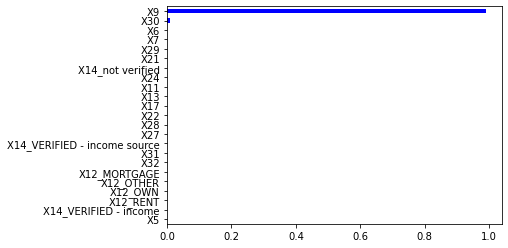

In [93]:
importances_rf = pd.Series(RF.feature_importances_,index = x.columns)

sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [94]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'max_depth':np.arange(1,10),'min_samples_leaf':[0.05,0.1,0.15,0.2,0.25,0.3]}
#RF = RandomForestRegressor()
#RF_cv = GridSearchCV(RF,param_grid,cv=5)
#RF_cv.fit(x,y)
#RF_cv.best_params_

#### 4. Support Vector Regression

In [95]:
SV = SVR()

In [96]:
SV.fit(X_train,y_train)

y_pred = SV.predict(X_test)

SV_mse = MSE(y_test,y_pred)

SV_rmse = SV_mse**(1/2)

print('The Test set RMSE for Support Vector Regression is {:.3f}'.format(SV_rmse))

The Test set RMSE for Support Vector Regression is 0.046


#### 5. K-Nearest Neighbor Regression

In [97]:
KNN = KNeighborsRegressor(n_neighbors=5)

In [98]:
KNN.fit(X_train,y_train)

y_pred = KNN.predict(X_test)

KNN_mse = MSE(y_test,y_pred)

KNN_rmse = KNN_mse**(1/2)

print('The Test set RMSE for K-Nearnest Neighbor Regression is {:.3f}'.format(KNN_rmse))

The Test set RMSE for K-Nearnest Neighbor Regression is 0.022


### Conclusion: After comparing rmse from all 5 models, we can see that Linear Regression gives the best result, which is 0.020

### Step 3: Holdout Data Loading and Cleaning (ready for final prediction)

In [99]:
df_holdout = pd.read_csv('/Users/Xingkang/Desktop/UChicago/Quarter 2/MSCA 31008 Data Mining Principles/Assignment_3/Loan_Prediction/Holdout for Testing.csv')

In [100]:
df_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

#### We will clean and reconstruct the Holdout data set as what we did above

In [101]:
df_holdout.drop(['X1','X2','X3','X4'],axis=1,inplace=True)

In [102]:
df_holdout['X5'] = df_holdout['X5'].apply(lambda x: x.split('$')[1])
df_holdout['X5'] = df_holdout['X5'].str.replace(',','')
df_holdout['X5'] = pd.to_numeric(df_holdout['X5'])

In [103]:
df_holdout['X6'] = df_holdout['X6'].apply(lambda x: x.split('$')[1])
df_holdout['X6'] = df_holdout['X6'].str.replace(',','')
df_holdout['X6'] = pd.to_numeric(df_holdout['X6'])

In [104]:
df_holdout['X7'] = df_holdout['X7'].apply(lambda x: 1 if x==' 36 months' else 0)

In [105]:
df_holdout.drop('X8',axis=1,inplace=True)

In [106]:
df_holdout['X9'] = le9.transform(df_holdout['X9'])

In [107]:
df_holdout.drop('X10',axis=1,inplace=True)

In [108]:
df_holdout['X11'].value_counts()

10+ years    26723
2 years       7220
< 1 year      6459
3 years       6441
1 year        5094
4 years       4603
5 years       4583
7 years       3978
8 years       3970
6 years       3385
9 years       3162
Name: X11, dtype: int64

In [109]:
df_holdout.loc[df_holdout['X11']=='10+ years','X11'] = 10
df_holdout.loc[df_holdout['X11']=='1 year','X11'] = 1
df_holdout.loc[df_holdout['X11']=='2 years','X11'] = 2
df_holdout.loc[df_holdout['X11']=='3 years','X11'] = 3
df_holdout.loc[df_holdout['X11']=='4 years','X11'] = 4
df_holdout.loc[df_holdout['X11']=='5 years','X11'] = 5
df_holdout.loc[df_holdout['X11']=='6 years','X11'] = 6
df_holdout.loc[df_holdout['X11']=='7 years','X11'] = 7
df_holdout.loc[df_holdout['X11']=='8 years','X11'] = 8
df_holdout.loc[df_holdout['X11']=='9 years','X11'] = 9
df_holdout.loc[df_holdout['X11']=='< 1 year','X11'] = 0

In [110]:
df_holdout['X11']= pd.to_numeric(df_holdout['X11'])

df_holdout['X11'].fillna(df_holdout['X11'].mode()[0],inplace=True)

In [111]:
df_holdout['X12'].value_counts()

MORTGAGE    38994
RENT        32778
OWN          8228
Name: X12, dtype: int64

In [112]:
X12 = pd.get_dummies(df_holdout['X12'],prefix='X12')

In [113]:
df_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X5      80000 non-null  int64  
 1   X6      80000 non-null  int64  
 2   X7      80000 non-null  int64  
 3   X9      80000 non-null  int64  
 4   X11     80000 non-null  float64
 5   X12     80000 non-null  object 
 6   X13     80000 non-null  float64
 7   X14     80000 non-null  object 
 8   X15     80000 non-null  object 
 9   X16     15 non-null     object 
 10  X17     80000 non-null  object 
 11  X18     80000 non-null  object 
 12  X19     80000 non-null  object 
 13  X20     80000 non-null  object 
 14  X21     80000 non-null  float64
 15  X22     80000 non-null  int64  
 16  X23     80000 non-null  object 
 17  X24     80000 non-null  int64  
 18  X25     41296 non-null  float64
 19  X26     13839 non-null  float64
 20  X27     80000 non-null  int64  
 21  X28     80000 non-null  int64  
 22

In [114]:
df_holdout.drop('X12',axis=1,inplace=True)

In [115]:
df_holdout['X12_OTHER']=0

In [116]:
df_holdout = pd.concat([df_holdout,X12],axis=1)

In [117]:
X14 = pd.get_dummies(df_holdout['X14'],prefix='X14')

In [118]:
df_holdout = pd.concat([df_holdout,X14],axis=1)

In [119]:
df_holdout.drop('X14',axis=1,inplace=True)

In [120]:
df_holdout.drop('X15',axis=1,inplace=True)
df_holdout.drop('X16',axis=1,inplace=True)

In [121]:
df_holdout['X17'].value_counts()

debt_consolidation    49884
credit_card           18660
home_improvement       3920
other                  3383
major_purchase         1232
small_business          668
medical                 619
car                     573
moving                  393
vacation                359
house                   266
renewable_energy         42
wedding                   1
Name: X17, dtype: int64

In [122]:
df_holdout['X17'] = le17.transform(df_holdout['X17'])

In [123]:
df_holdout.drop('X18',axis=1,inplace=True)
df_holdout.drop('X19',axis=1,inplace=True)
df_holdout.drop('X20',axis=1,inplace=True)

In [124]:
df_holdout.drop('X23',axis=1,inplace=True)

In [125]:
df_holdout.drop('X25',axis=1,inplace=True)
df_holdout.drop('X26',axis=1,inplace=True)

In [126]:
df_holdout['X30'] = df_holdout[df_holdout['X30'].notnull()]['X30'].apply(lambda x: x.split('%')[0])

df_holdout['X30'] = pd.to_numeric(df_holdout['X30'])/100

df_holdout['X30'] = df_holdout['X30'].fillna(df_holdout['X30'].mean())

In [127]:
df_holdout['X32']=df_holdout['X32'].apply(lambda x:1 if x=='f' else 0)

#### Reorder the order of the holdout dataset as it is of the modeling dataset

In [128]:
df_holdout = df_holdout[x.columns]

In [129]:
df_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X5                            80000 non-null  int64  
 1   X6                            80000 non-null  int64  
 2   X7                            80000 non-null  int64  
 3   X9                            80000 non-null  int64  
 4   X11                           80000 non-null  float64
 5   X13                           80000 non-null  float64
 6   X17                           80000 non-null  int64  
 7   X21                           80000 non-null  float64
 8   X22                           80000 non-null  int64  
 9   X24                           80000 non-null  int64  
 10  X27                           80000 non-null  int64  
 11  X28                           80000 non-null  int64  
 12  X29                           80000 non-null  int64  
 13  X

#### Scale the holdout dataset using the same way as we did for the modeling dataset

In [130]:
df_holdout_scaled = std_scaler.transform(df_holdout)

### Step 4: Final Prediction for Holdout Data
- We use Logistic Regression since it gave us the best RMSE among all the models we used
- We use the model that already fit the Modeling dataset and directly apply it to the holdout dataset

In [131]:
hold_out_pred = LR.predict(df_holdout_scaled)

In [132]:
hold_out_pred = pd.DataFrame(hold_out_pred,columns=['Predicted Loan Rate'])

In [133]:
hold_out_pred

,Predicted Loan Rate
0,0.160241
1,0.074915
2,0.136737
3,0.175506
4,0.116593
...,...
79995,0.079942
79996,0.199864
79997,0.163958
79998,0.138163


In [134]:
df_holdout_original = pd.read_csv('/Users/Xingkang/Desktop/UChicago/Quarter 2/MSCA 31008 Data Mining Principles/Assignment_3/Loan_Prediction/Holdout for Testing.csv')

In [135]:
Final = pd.concat((hold_out_pred,df_holdout_original),axis=1)

In [136]:
Final.drop('X1',axis=1,inplace=True)

In [137]:
import os
current_path = os.getcwd()

In [138]:
current_path

'/Users/Xingkang/Desktop'

In [139]:
Final.to_csv('Results from Jack Gao.csv')

### Final Thoughts:

We used five different models for regesssion analysis here, and they all have their pros and cons. We started with the most basic models such as Linear Regression and Decison Tree Regression, and they turned out to produce very good results. Those two models are easy to understand and are not computing expensive. The potential problem for them is overfitting, but we prevented it by selecting the appropriate and relevant features, and we confirmed no overfitting by doing cross validaiton. Support Vector Machine is also very straight forward without much computing expense, but the result is not as good as Linear Regression and Decision Tree. Finally, Random Forrest and KNN are the more advanced modeling techniques, and they both require much more computing power. Random Forrest can effective prevent overfitting, but the cost you pay is much difficulty to interpret the model. Finally, KNN regressor gives relatively small RMSE, but its computing time is by the far the longest among all the models.